# Exploratory Data Analysis

Richard Hsu 7-16-16

In [50]:
import numpy as np
import pandas as pd

from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

## Weather

In [51]:
# Load data
df = pd.read_csv("data/weather.csv")

# Check head
df.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [52]:
# check columns
print df.columns.values

['Station' 'Date' 'Tmax' 'Tmin' 'Tavg' 'Depart' 'DewPoint' 'WetBulb' 'Heat'
 'Cool' 'Sunrise' 'Sunset' 'CodeSum' 'Depth' 'Water1' 'SnowFall'
 'PrecipTotal' 'StnPressure' 'SeaLevel' 'ResultSpeed' 'ResultDir'
 'AvgSpeed']


In [53]:
# check counts
df.count()

Station        2944
Date           2944
Tmax           2944
Tmin           2944
Tavg           2944
Depart         2944
DewPoint       2944
WetBulb        2944
Heat           2944
Cool           2944
Sunrise        2944
Sunset         2944
CodeSum        2944
Depth          2944
Water1         2944
SnowFall       2944
PrecipTotal    2944
StnPressure    2944
SeaLevel       2944
ResultSpeed    2944
ResultDir      2944
AvgSpeed       2944
dtype: int64

In [54]:
# Check counts for missing values in each column
print df.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64


In [55]:
# Get summary statistics for data
df.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [56]:
data = pd.DataFrame(df, columns = ['Date', 'Tmax'])
data

,Date,Tmax
0,2007-05-01,83
1,2007-05-01,84
2,2007-05-02,59
3,2007-05-02,60
4,2007-05-03,66
5,2007-05-03,67
6,2007-05-04,66
7,2007-05-04,78
8,2007-05-05,66
9,2007-05-05,66


In [57]:
# Check data types
print df.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object


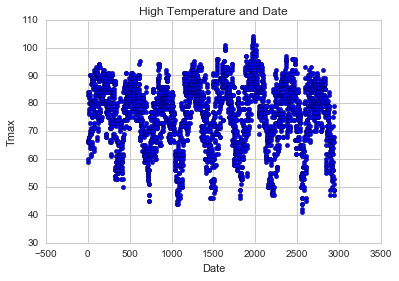

In [58]:
# scatter plot of date vs. Tmax
plt.scatter(df.index.values, df['Tmax'])
plt.xlabel('Date')
plt.ylabel('Tmax')
plt.title('High Temperature and Date')

## GIS (Spraying data)

In [59]:
# load spray data
spray_data = pd.read_csv("data/spray.csv")

In [60]:
spray_data.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [61]:
spray_data.count()

Date         14835
Time         14251
Latitude     14835
Longitude    14835
dtype: int64

In [62]:
# Check counts for missing values in each column
print spray_data.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64


In [63]:
# create aa function to handle missing data

def wrangler(df):
    if df.isnull().sum().sum():
        print "There are missing values"
        df = df.dropna()
        print "Missing values dropped"
    
    return df

In [64]:
spray_data = wrangler(spray_data)

There are missing values
Missing values dropped


In [65]:
# check for missing values in each column after dropping
print "Missing values:"
print spray_data.isnull().sum()

Missing values:
Date         0
Time         0
Latitude     0
Longitude    0
dtype: int64


In [66]:
spray_data.count()

Date         14251
Time         14251
Latitude     14251
Longitude    14251
dtype: int64

## Main Dataset

In [67]:
# load main data_set
main_data = pd.read_csv("data/train.csv")

In [68]:
main_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [69]:
# get a count to see if anything is missing
main_data.count()

Date                      10506
Address                   10506
Species                   10506
Block                     10506
Street                    10506
Trap                      10506
AddressNumberAndStreet    10506
Latitude                  10506
Longitude                 10506
AddressAccuracy           10506
NumMosquitos              10506
WnvPresent                10506
dtype: int64

In [70]:
# Get summary statistics for data
main_data.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


## Joined Dataset Between Weather and Main Dataset

In [71]:
# groupby function on date as column and use mean (mean of the values in there) as aggregator
df.groupby(['Date']).mean()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Date,,,,,,
2007-05-01,1.5,83.5,51.0,51.0,2.20,26.0
2007-05-02,1.5,59.5,42.5,42.0,13.15,3.0
2007-05-03,1.5,66.5,47.0,40.0,12.30,6.5
2007-05-04,1.5,72.0,50.0,41.5,10.25,7.5
2007-05-05,1.5,66.0,53.5,38.5,11.45,7.0
2007-05-06,1.5,68.0,50.5,30.0,14.10,10.5
2007-05-07,1.5,83.5,48.5,40.0,8.55,17.5
2007-05-08,1.5,81.0,57.0,57.5,2.60,9.5
2007-05-09,1.5,76.5,62.0,59.5,3.90,8.0


In [72]:
from datetime import datetime
#pd.to_datetime(df['Date'], infer_datetime_format=True)

#df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
pd.to_datetime(df['Date'])
pd.to_datetime(main_data['Date'])
#df.dtypes

0       2007-05-29
1       2007-05-29
2       2007-05-29
3       2007-05-29
4       2007-05-29
5       2007-05-29
6       2007-05-29
7       2007-05-29
8       2007-05-29
9       2007-05-29
10      2007-05-29
11      2007-05-29
12      2007-05-29
13      2007-05-29
14      2007-05-29
15      2007-05-29
16      2007-05-29
17      2007-05-29
18      2007-05-29
19      2007-05-29
20      2007-05-29
21      2007-05-29
22      2007-05-29
23      2007-05-29
24      2007-05-29
25      2007-06-05
26      2007-06-05
27      2007-06-05
28      2007-06-05
29      2007-06-05
           ...    
10476   2013-09-26
10477   2013-09-26
10478   2013-09-26
10479   2013-09-26
10480   2013-09-26
10481   2013-09-26
10482   2013-09-26
10483   2013-09-26
10484   2013-09-26
10485   2013-09-26
10486   2013-09-26
10487   2013-09-26
10488   2013-09-26
10489   2013-09-26
10490   2013-09-26
10491   2013-09-26
10492   2013-09-26
10493   2013-09-26
10494   2013-09-26
10495   2013-09-26
10496   2013-09-26
10497   2013

In [73]:
joined_data = main_data.merge(df, left_on='Date', right_on='Date', how='inner')

In [74]:
joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [75]:
joined_data.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
Station                     int64
Tmax                        int64
Tmin                        int64
Tavg                       object
Depart                     object
DewPoint                    int64
WetBulb                    object
Heat                       object
Cool                       object
Sunrise                    object
Sunset                     object
CodeSum                    object
Depth                      object
Water1                     object
SnowFall                   object
PrecipTotal                object
StnPressure                object
SeaLevel      

In [76]:
joined_data.corr()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
Block,1.000000,0.091110,-0.090375,0.222134,-0.172388,0.004877,0.000000,-0.001622,-0.012408,-0.004430,-0.008600,0.017816
Latitude,0.091110,1.000000,-0.701795,0.444026,-0.184806,0.028697,0.000000,-0.065662,-0.096024,-0.064413,0.025831,0.006793
Longitude,-0.090375,-0.701795,1.000000,-0.456775,0.036633,-0.060345,0.000000,0.080886,0.099759,0.086615,-0.022514,0.001721
AddressAccuracy,0.222134,0.444026,-0.456775,1.000000,-0.248414,0.008064,0.000000,-0.074680,-0.105742,-0.081297,0.006293,0.011235
NumMosquitos,-0.172388,-0.184806,0.036633,-0.248414,1.000000,0.196820,0.000000,0.158969,0.193559,0.158800,0.003601,-0.032640
WnvPresent,0.004877,0.028697,-0.060345,0.008064,0.196820,1.000000,0.000000,0.048140,0.073005,0.085632,-0.045567,0.000170
Station,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.008336,0.122618,-0.010944,-0.012276,0.012858
Tmax,-0.001622,-0.065662,0.080886,-0.074680,0.158969,0.048140,0.008336,1.000000,0.774054,0.741360,-0.044723,0.147885
Tmin,-0.012408,-0.096024,0.099759,-0.105742,0.193559,0.073005,0.122618,0.774054,1.000000,0.880983,0.021096,0.083983
DewPoint,-0.004430,-0.064413,0.086615,-0.081297,0.158800,0.085632,-0.010944,0.741360,0.880983,1.000000,-0.036022,0.084020


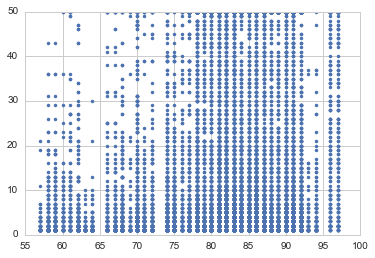

In [77]:
# Temperature and Number of Mosquitos
# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(joined_data.Tmax, joined_data.NumMosquitos, '.')
# show the plot
plt.show()

In [78]:
number_mosquitos = joined_data.groupby('NumMosquitos')

In [79]:
print number_mosquitos

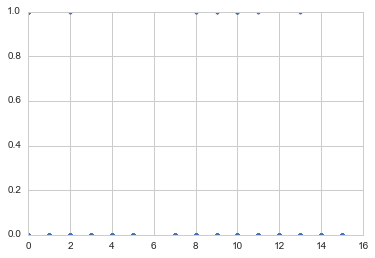

In [80]:
plt.figure()
# generate a scatterplot inside the figure
plt.plot(joined_data.Heat, joined_data.WnvPresent, '.')
# show the plot
plt.show()

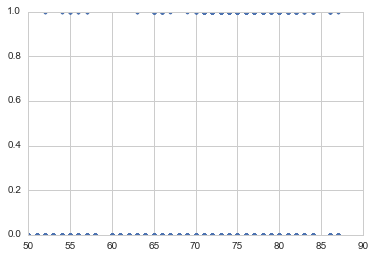

In [81]:
plt.figure()
# generate a scatterplot inside the figure
plt.plot(joined_data.Tavg, joined_data.WnvPresent, '.')
# show the plot
plt.show()

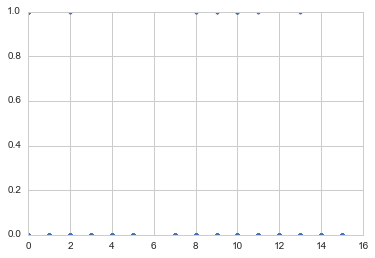

In [82]:
plt.figure()
# generate a scatterplot inside the figure
plt.plot(joined_data.Heat, joined_data.WnvPresent, '.')
# show the plot
plt.show()

In [103]:
def pre_proc(df):
    # Create dummy variables for all non-numerical columns
    

    
    # Get dummy variables for Species
    df = df.join(pd.get_dummies(df['Species'], prefix='Species'))
    # Remove Species column
    df = df.drop(['Species'], axis=1)
    
    # Get dummy variables for Street
    df = df.join(pd.get_dummies(df['Street'], prefix='Street'))
    # Remove Species column
    df = df.drop(['Street'], axis=1)
    
    # Get dummy variables for Address
    df = df.join(pd.get_dummies(df['Address'], prefix='Address'))
    # Remove Address column
    df = df.drop(['Address'], axis=1)
    
     # Get dummy variables for AddressNumberAndStreet
    df = df.join(pd.get_dummies(df['AddressNumberAndStreet'], prefix='AddressNumberAndStreet'))
    # Remove Address column
    df = df.drop(['AddressNumberAndStreet'], axis=1)
    
    # Get dummy variables for Trap
    df = df.join(pd.get_dummies(df['Trap'], prefix='Trap'))
    # Remove Address column
    df = df.drop(['Trap'], axis=1)



    return df

In [104]:
# Apply pre_proc() to DF
final_data = pre_proc(joined_data)

# Check cleaned data
final_data.head()

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2007-05-29,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-29,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-29,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-29,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-29,62,41.994991,-87.769279,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:

list(final_data.columns.values)


['Date',
 'Block',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'Depart',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'CodeSum',
 'Depth',
 'Water1',
 'SnowFall',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'Species_CULEX ERRATICUS',
 'Species_CULEX PIPIENS',
 'Species_CULEX PIPIENS/RESTUANS',
 'Species_CULEX RESTUANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Species_CULEX TERRITANS',
 'Street_  W ARMITAGE AVENUE',
 'Street_ E 105TH ST',
 'Street_ E 111TH ST',
 'Street_ E 115TH ST',
 'Street_ E 118TH ST',
 'Street_ E 130TH ST',
 'Street_ E 138TH ST',
 'Street_ E 67TH ST',
 'Street_ E 91ST PL',
 'Street_ E 91ST ST',
 'Street_ E RANDOLPH ST',
 'Street_ N ASHLAND AVE',
 'Street_ N ASHLAND AVE OVERPASS',
 'Street_ N AUSTIN AVE',
 'Street_ N AVONDALE AVE',
 'Street_ N CALIFORNIA AVE',
 'Street_ N CAMPBELL AVE',
 'Street_ N CANNON DR'

In [106]:
# Get numerical columns
num_cols = set(final_data.dtypes[((final_data.dtypes=="int64")|(final_data.dtypes=="float64"))].index)
non_cols = set(final_data.columns)-num_cols

#print "Numerical columns:"
#print num_cols
#print "Non-numerical columns:"
#print non_cols

In [107]:
final_numeric_data = final_data.apply(pd.to_numeric, errors='coerce')

In [108]:
# Get numerical columns
num_cols = set(final_numeric_data.dtypes[((final_numeric_data.dtypes=="int64")|(final_numeric_data.dtypes=="float64"))].index)
non_cols = set(final_numeric_data.columns)-num_cols

In [101]:


print "Numerical columns:"
print num_cols
print "Non-numerical columns:"
print non_cols

Numerical columns:
set(['Street_ E 111TH ST', 'Street_ S CALIFORNIA', 'Trap_T081', 'Address_5800 North Pulaski Road, Chicago, IL 60646, USA', 'Trap_T083', 'Station', 'Trap_T085', 'Trap_T084', 'Trap_T086', 'Trap_T089', 'Trap_T088', 'Address_6500 North Oak Park Avenue, Chicago, IL 60631, USA', 'Address_1100 Roosevelt Road, Chicago, IL 60608, USA', 'Tmin', 'Trap_T160', 'Trap_T161', 'Street_ W GRANVILLE AVE', 'StnPressure', 'Street_ S AVENUE G', 'Street_ S CORNELL AVE', 'Address_3900 North Springfield Avenue, Chicago, IL 60618, USA', 'Street_ S AVENUE L', 'Street_ W GREENLEAF AVE', 'Street_ W MONTROSE DR', 'Trap_T018', 'Trap_T019', 'Street_ S STONY ISLAND AVE', 'Trap_T012', 'Trap_T013', 'Trap_T011', 'Trap_T016', 'SeaLevel', 'Street_ E 67TH ST', 'Trap_T015', 'Trap_T082', 'Street_ N MCCLELLAN AVE', 'Sunrise', 'Street_ W OHARE', 'Street_ N OAKLEY AVE', 'Street_ W 18TH ST', 'Address_South Mackinaw Avenue, Chicago, IL 60617, USA', 'NumMosquitos', 'Address_East 138th Street, Riverdale, IL 60827,

In [109]:
final_numeric_data.head()

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,NaN,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,62,41.994991,-87.769279,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# drop the date column
final_numeric_data.drop(['Date'], axis=1)


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,41.994991,-87.769279,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,62,41.994991,-87.769279,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,79,41.974089,-87.824812,8,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,79,41.974089,-87.824812,8,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,79,41.974089,-87.824812,8,4,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,79,41.974089,-87.824812,8,4,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
final_numeric_data

,Date,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,NaN,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,41,41.954690,-87.800991,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,41,41.954690,-87.800991,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,62,41.994991,-87.769279,9,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,NaN,62,41.994991,-87.769279,9,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,NaN,79,41.974089,-87.824812,8,1,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,NaN,79,41.974089,-87.824812,8,1,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NaN,79,41.974089,-87.824812,8,4,0,1,88,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,NaN,79,41.974089,-87.824812,8,4,0,2,88,65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
def drop_date(df):
    # Create dummy variables for all non-numerical columns
    # Remove Species column
    df = df.drop(['Date'], axis=1)
    return df

In [113]:
final_numeric_data = drop_date(final_numeric_data)

In [114]:
final_numeric_data

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,41.994991,-87.769279,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,62,41.994991,-87.769279,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,79,41.974089,-87.824812,8,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,79,41.974089,-87.824812,8,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,79,41.974089,-87.824812,8,4,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,79,41.974089,-87.824812,8,4,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
final_numeric_data = final_numeric_data.fillna(0)

In [117]:
final_numeric_data

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,...,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,41.954690,-87.800991,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41,41.954690,-87.800991,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62,41.994991,-87.769279,9,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,62,41.994991,-87.769279,9,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,79,41.974089,-87.824812,8,1,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,79,41.974089,-87.824812,8,1,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,79,41.974089,-87.824812,8,4,0,1,88,60,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,79,41.974089,-87.824812,8,4,0,2,88,65,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
